In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import os


In [5]:
CSV_FILE_PATH = "/Users/pritpatel/Documents/End to End Machine Learning project./CaliforniaHousing/housing.csv"
if os.path.exists(CSV_FILE_PATH):
    data = pd.read_csv(CSV_FILE_PATH)
    print("Dataset loaded successfully.")
    print("First 5 rows of the dataset:", data.head())
else:
    print(f"File not found: {CSV_FILE_PATH}")
    data = pd.DataFrame()

Dataset loaded successfully.
First 5 rows of the dataset:    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [7]:
# 1. info() gives you data types and tells you where the nulls (missing values) are
print("\n----------- DATA INFO -----------")
print(data.info())

# 2. describe() gives you the math (mean, min, max, std) for the numbers
print("\n----------- STATISTICAL SUMMARY -----------")
print(data.describe())

# 3. Only look at value_counts for the CATEGORICAL column (ocean_proximity)
print("\n----------- OCEAN PROXIMITY COUNTS -----------")
print(data["ocean_proximity"].value_counts())


----------- DATA INFO -----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

----------- STATISTICAL SUMMARY -----------
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     

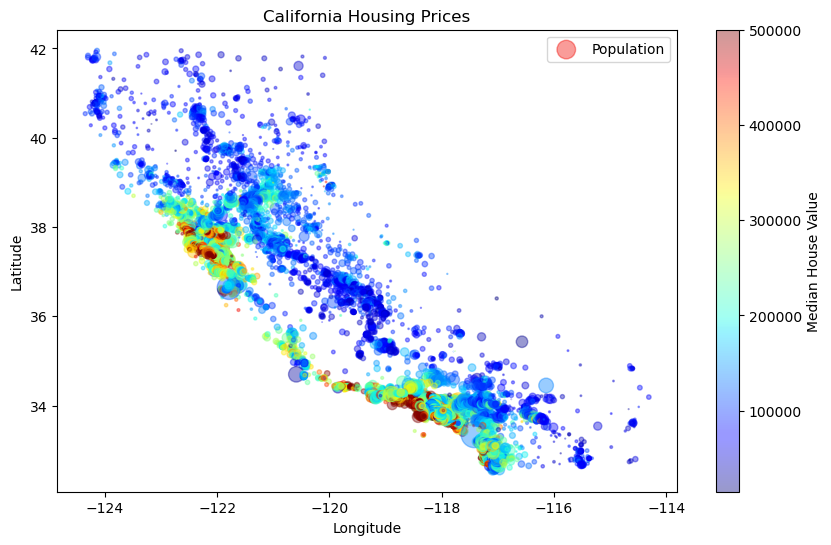

In [8]:
#data visulaizer 
plt.figure(figsize=(10, 6))
plt.scatter(data['longitude'], data['latitude'], alpha=0.4,
            s=data['population']/100, c=data['median_house_value'], cmap='jet', label='Population')
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices')
plt.legend()
plt.show()

<Figure size 2000x1500 with 0 Axes>

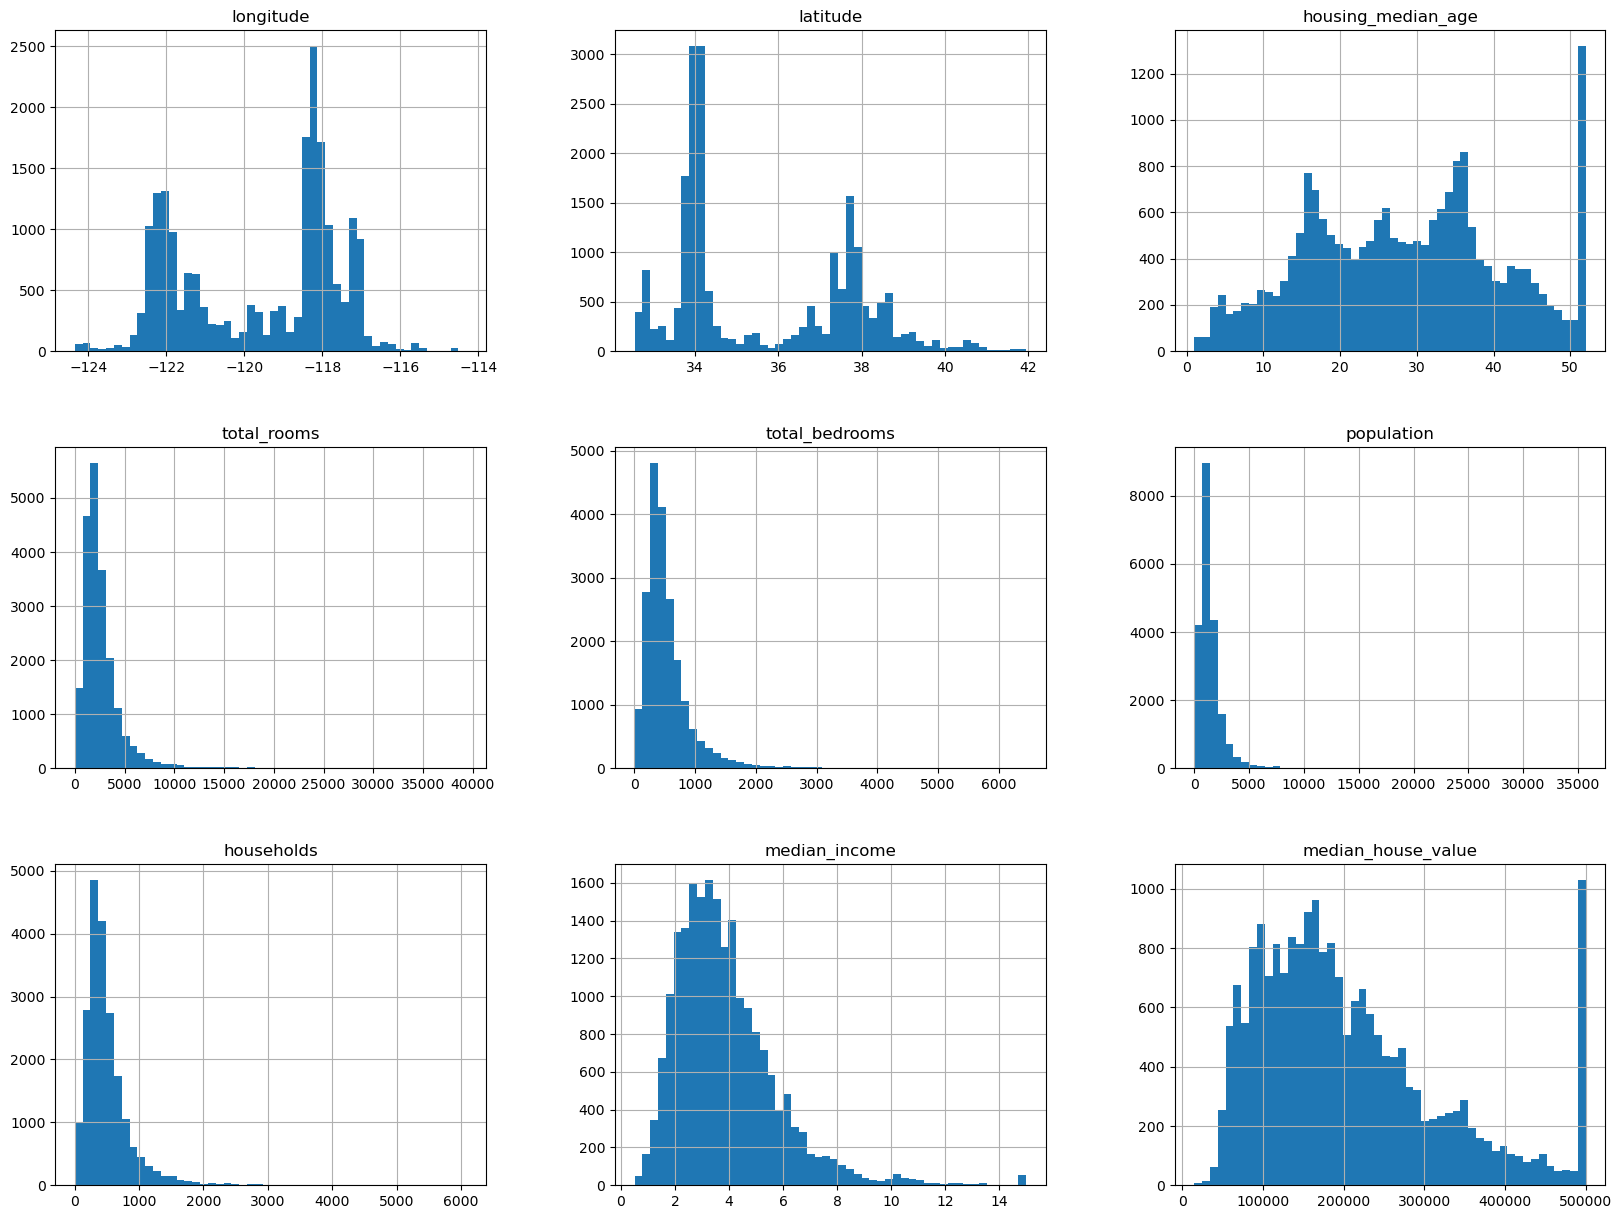

In [9]:
## Histogram of all numerical attributes
plt.figure(figsize=(20, 15))
data.hist(bins=50, figsize=(20,15))
plt.show()

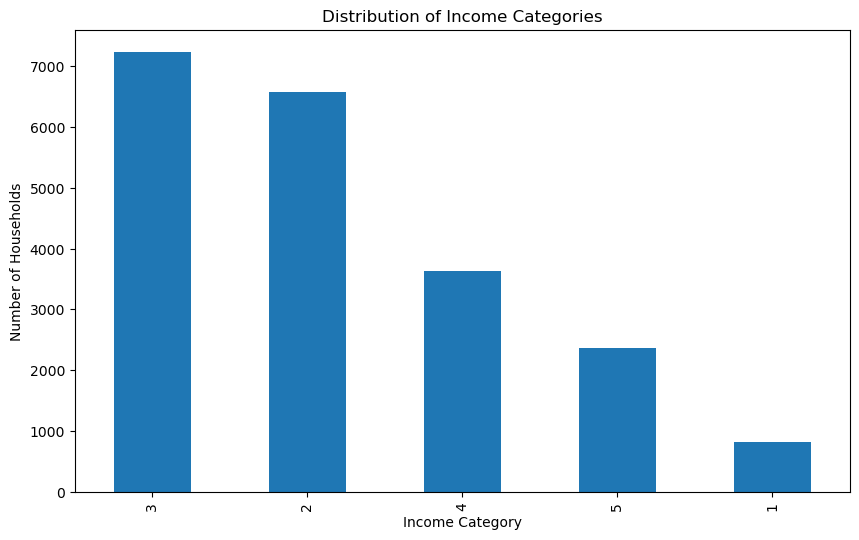

In [13]:
data["income_cat"]= pd.cut(data["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

data['imcome_cat'].value_counts().plot(kind='bar', figsize=(10,6))
plt.xlabel('Income Category')
plt.ylabel('Number of Households')
plt.title('Distribution of Income Categories')
plt.show()

In [14]:
data["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

In [15]:
data["median_income"].value_counts()

median_income
3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: count, Length: 12928, dtype: int64

20640